In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

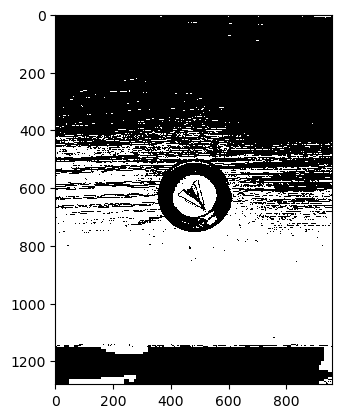

In [20]:
img = plt.imread('coin_dimlight.jpg')

# Convert BGR image to HSV
imgHSV = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Extract individual channels
imgHue = imgHSV[:, :, 0]
imgSat = imgHSV[:, :, 1]
imgVal = imgHSV[:, :, 2]

ret, mask = cv.threshold(imgSat, 100, 150, cv.THRESH_BINARY)
plt.imshow(mask, cmap = plt.cm.gray)



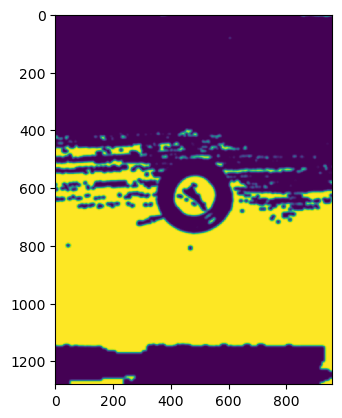

In [60]:
disc = cv.getStructuringElement(cv.MORPH_ELLIPSE, (5,5))
dil_mask = cv.dilate(mask, disc, iterations=1)
er_mask = cv.erode(dil_mask, disc, iterations = 3)
gfilter = cv.GaussianBlur(er_mask, (31,31), 3)
avgkernel = np.ones((3,3),np.float32)/(9)
meanfiltered = cv.filter2D(gfilter, -1, avgkernel)
plt.imshow(meanfiltered)

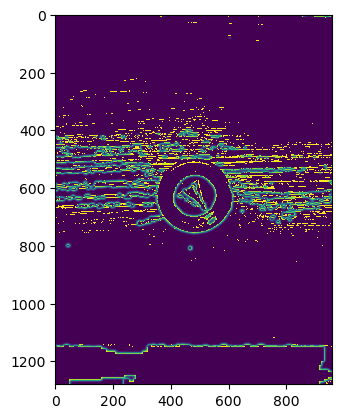

In [61]:
edges = cv.absdiff(mask, meanfiltered)
plt.imshow(edges)

In [ ]:
print(edges)
height, width = meanfiltered.shape
# Initialize an accumulator array for x-gradient
gradient_x_acc = np.zeros((height, width - 1))
gradient_y_acc = np.zeros((height - 1, width))
# Iterate through each row and compute differences
for row in range(height):
    for col in range(width - 1):
        gradient_x_acc[row, col] = meanfiltered[row, col + 1] - meanfiltered[row, col]
for col in range(width):
    for row in range(height-1):
        gradient_y_acc = meanfiltered[row + 1, col] - meanfiltered[row, col]



Now for the hough circle stuff... for a test we will define max and min radius.


In [65]:
max_radius = 500
min_radius = 0


In [67]:
height, width = meanfiltered.shape
accumulator = np.zeros((width, height, max_radius - min_radius + 1), dtype=np.uint64)



ValueError: operands could not be broadcast together with shapes (960,) (36000,) 